## CNN Classifier (Mask, No Mask, Incorrectly wearing Mask)

### Import Packages

In [1]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import sklearn
from sklearn.model_selection import train_test_split
import cv2

import seaborn as sns
import pickle
import os

### Load in the dataset that was preprocessed from local directory

In [2]:
# Load in the files from Google Drive 

filename = '/content/drive/My Drive/Face Detection Dataset/data_pickle/X.pickle'
pickle_in = open(filename, 'rb')
X = pickle.load(pickle_in)

filename = '/content/drive/My Drive/Face Detection Dataset/data_pickle/y.pickle'
pickle_in = open(filename, 'rb')
y = pickle.load(pickle_in)

CATEGORIES = ['Without Mask', 'Incorrectly Wearing Mask', 'Wearing Mask']

In [3]:
# double check to see the types of the loaded files
print('Type of X:', type(X))
print('Type of y:', type(y))

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [4]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (17687, 224, 224)
Shape of y: (17687,)


In [5]:
# print one example of dataset
print('X:')
print(X[13])
print('y:')
print(y[13])

X:
[[ 21  21  21 ... 243 243 243]
 [ 21  21  21 ... 243 243 243]
 [ 21  21  21 ... 243 243 243]
 ...
 [ 97  97  98 ...  51  52  52]
 [ 97  97  97 ...  51  52  52]
 [ 97  97  97 ...  51  52  52]]
y:
0


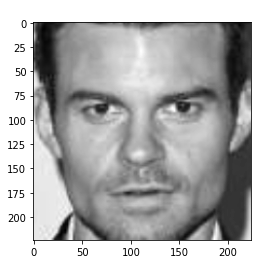

In [6]:
# Display the one example
plt.imshow(X[10], cmap='gray')
plt.title(CATEGORIES[y[10]], color='white')
print('')

#### EDA

In [7]:
resized_X = []
for img in X:
    resized_X.append(cv2.resize(img, (64, 64)))

In [8]:
X = np.asarray(resized_X)
X = X.reshape(-1, 64, 64, 1)
print(X.shape)

(17687, 64, 64, 1)


In [9]:
# normalize the pixel values
X = X / 255.0

In [10]:
IMG_DIM = X.shape[1]
print('IMG_DIM:',IMG_DIM)

IMG_DIM: 64


In [11]:
# Split dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

Training Size: 14149
Testing  Size: 3538


#### Building and fitting the CNN Model 

In [13]:
cnn_model = tensorflow.keras.models.Sequential()

In [14]:
# Start of Convolution Layers & Maxpooling
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(IMG_DIM, IMG_DIM, 1)))
cnn_model.add(tensorflow.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(tensorflow.keras.layers.MaxPool2D())

# Start of Neural Nets
cnn_model.add(tensorflow.keras.layers.Flatten())

cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(512, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dropout(0.3))
cnn_model.add(tensorflow.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        3

In [16]:
# Compile the Model
cnn_model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [17]:
# Train Model
epochs = 10
cnn_model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/10
398/398 [==============================] - 6s 16ms/step - loss: 0.3631 - acc: 0.8272 - val_loss: 0.1033 - val_acc: 0.9675
Epoch 2/10
398/398 [==============================] - 6s 15ms/step - loss: 0.0984 - acc: 0.9685 - val_loss: 0.0944 - val_acc: 0.9717
Epoch 3/10
398/398 [==============================] - 6s 15ms/step - loss: 0.0729 - acc: 0.9753 - val_loss: 0.0628 - val_acc: 0.9788
Epoch 4/10
398/398 [==============================] - 6s 15ms/step - loss: 0.0522 - acc: 0.9825 - val_loss: 0.0563 - val_acc: 0.9845
Epoch 5/10
398/398 [==============================] - 6s 15ms/step - loss: 0.0549 - acc: 0.9823 - val_loss: 0.0883 - val_acc: 0.9703
Epoch 6/10
398/398 [==============================] - 6s 15ms/step - loss: 0.0391 - acc: 0.9870 - val_loss: 0.0544 - val_acc: 0.9767
Epoch 7/10
398/398 [==============================] - 6s 15ms/step - loss: 0.0365 - acc: 0.9873 - val_loss: 0.0683 - val_acc: 0.9717
Epoch 8/10
398/398 [==============================] - 6s 15ms/step - 

#### Evalute Performance

In [18]:
# Evaluate performance
cnn_model.evaluate(X_test, y_test)

111/111 [==============================] - 1s 6ms/step - loss: 0.0380 - acc: 0.9876


[0.03797728940844536, 0.9875636100769043]

In [19]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1154
           1       1.00      0.99      0.99      1179
           2       0.98      0.99      0.98      1205

    accuracy                           0.99      3538
   macro avg       0.99      0.99      0.99      3538
weighted avg       0.99      0.99      0.99      3538



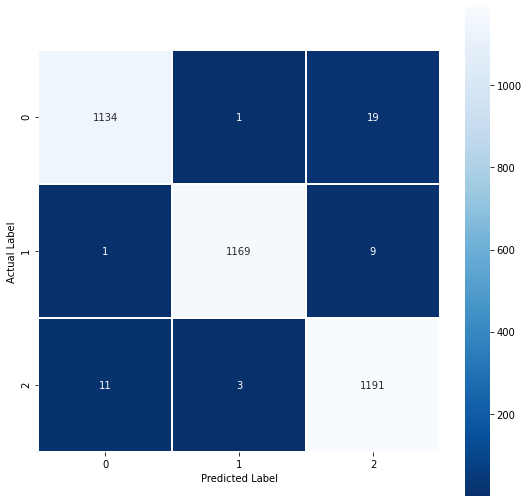

In [20]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(sklearn.metrics.classification_report(y_test, y_pred))

#### Save model for future use

In [21]:
path = './cnn'
cnn_model.save(path)

# To load
# model = tensorflow.keras.models.load_model(path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./cnn/assets
